In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [4]:
import os

path = os.path.dirname(os.getcwd())

In [5]:
data = pd.read_excel(f"{path}/files/Housing.xlsx", skiprows=0, names=['House Price', 'House Size (s.q.ft)', 'State', 'Number of Rooms', 'Year of Construction'])

In [6]:
data = data.drop(index=0, axis=0)
data

,House Price,House Size (s.q.ft),State,Number of Rooms,Year of Construction
1,11160000,1940,IN,8,2002
2,860000,1300,IN,5,1992
3,818400,1420,IN,6,1987
4,1000000,1680,IN,7,2000
5,640000,1270,IN,5,1995
6,1010000,1850,IN,7,1998
7,600000,1000,IN,4,2015
8,700000,1100,LA,4,2014
9,1100000,1600,LA,7,2017
10,570000,1000,NY,5,1997


In [7]:
data[['House Price', 'House Size (s.q.ft)']]

,House Price,House Size (s.q.ft)
1,11160000,1940
2,860000,1300
3,818400,1420
4,1000000,1680
5,640000,1270
6,1010000,1850
7,600000,1000
8,700000,1100
9,1100000,1600
10,570000,1000


## Univariate Regression

In [8]:
X = data['House Size (s.q.ft)']
y = data['House Price']

In [9]:
# Convert datatypes from object to int64
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [10]:
X

1     1940
2     1300
3     1420
4     1680
5     1270
6     1850
7     1000
8     1100
9     1600
10    1000
11    2150
12    1900
13    2200
14    1100
15     860
16    1325
17    1350
18    1600
19     950
20    1250
Name: House Size (s.q.ft), dtype: int64

In [11]:
y

1     11160000
2       860000
3       818400
4      1000000
5       640000
6      1010000
7       600000
8       700000
9      1100000
10      570000
11      860000
12     1085000
13     1250000
14      850000
15      640000
16      900000
17      730000
18      750000
19      650000
20      680000
Name: House Price, dtype: int64

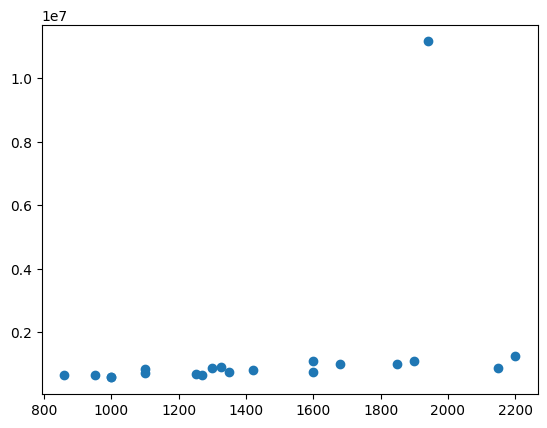

In [12]:
plt.scatter(X, y)
plt.show()

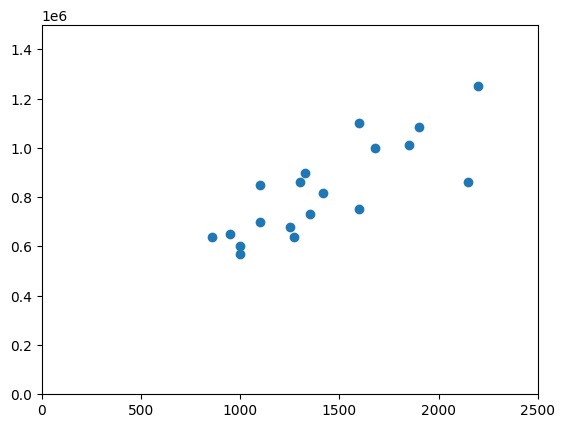

In [13]:
plt.scatter(X, y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

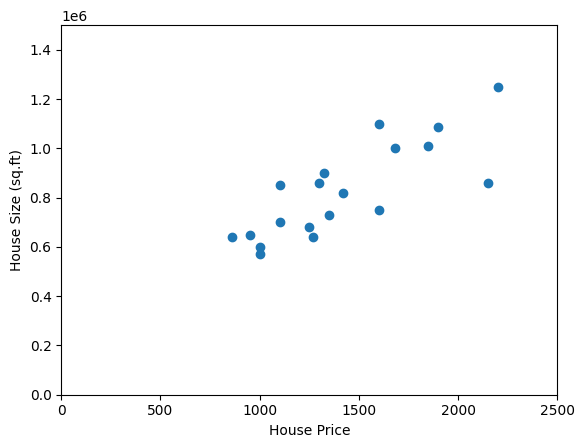

In [14]:
plt.scatter(X, y)
plt.axis([0, 2500, 0, 1500000])
plt.xlabel('House Price')
plt.ylabel('House Size (sq.ft)')
plt.show()

In [15]:
print(X.dtype)
print(y.dtype)

int64
int64


In [16]:
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()

In [17]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.518
Date:                Tue, 01 Apr 2025   Prob (F-statistic):              0.130
Time:                        22:32:14   Log-Likelihood:                -319.68
No. Observations:                  20   AIC:                             643.4
Df Residuals:                      18   BIC:                             645.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.547e+06   1.89e+06     -0.819      0.423   -5.51e+06    2.42e+06
House Size (s.q.ft)  2003.6088   1262.739      1.587      0.130    -649.307    4656.525
==============================================================================
Omnibus:                       44.756   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.544
Skew:                           3.536   Prob(JB):                     1.86e-36
Kurtosis:                      15.143   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Expected value of Y:

In [18]:
260800 + 402 * 1000

662800

## Alpha, Beta, R^2

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [20]:
# Beta
slope

np.float64(2003.60883743636)

In [21]:
# Alfa
intercept

np.float64(-1547034.8457925902)

In [22]:
r_value

np.float64(0.35029613500607415)

In [23]:
r_value ** 2

np.float64(0.12270738220019373)

In [24]:
p_value

np.float64(0.12998756148815313)

In [25]:
std_err

np.float64(1262.7389533800172)